# Clasificación con RNA

In [1]:
# Librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn
import sklearn.linear_model



In [2]:
# Funciones realizadas

def matrizConfusion(Yprueba,Yevaluacion):

    '''  
    Yprueba: Resultados de verderos
    Yevaluacion: Resultados de evaluación
    '''

    # Matriz ce confusión [4],[5]

    VA=0 # Veradadera aceptación
    FN=0 # Falsa negación
    FA=0 # Falsa aceptación
    VR=0 # Verdadero rechazo

    for i in range(len(Yprueba)):

        if Yprueba[i]==1 and Yevaluacion[i]==1:
            VA+=1
        
        elif Yprueba[i]==1 and Yevaluacion[i]==0:
            FN+=1
        
        elif Yprueba[i]==0 and Yevaluacion[i]==1:
            FA+=1
        
        else:
            VR+=1
            
    FR=FN # Falso rechazo    



    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)
    table_matrizConfusion=[
        ['', 'Enfermo','Sano'],
        ['Enfermo', VA,FN],
        ['Sano', FA,VR]]
    table = ax.table(cellText=table_matrizConfusion, loc='center',rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Matriz de confusión')

    plt.show()

    return [VA,FA,FR,VR]


def valoresEstadisticos(Yprueba,VA,FA,FR,VR):
    '''   
    Yprueba: Vector de resultados de prueba. 
    VA: Verdadera aceptación 
    FA: Falsa aceptación 
    FR: Falso rechazo 
    VR: Verdadero rechazo
    '''

    # Cálculo de valores estadísticos
    EM=(FA+FR)/len(Yprueba)

    Precision=VA/(VA+FA)
  

    sensibilidad=VA/(VA+FR)


    especificidad=VR/(VR+FA)
 
    Exactitud=(VA+VR)/len(Yprueba)
    fig = plt.figure(dpi=200)
    ax = fig.add_subplot(1,1,1)

    table_valoresEstadisticos=[
    ['Error medio', EM],
    ['Precisión',Precision],
    ['Sensibilidad',f'{sensibilidad*100} %'],
    ['Especificidad',f'{especificidad*100} %'],
    ['Proporción de falsa aceptación',f'{(1-especificidad)*100} %'],
    ['Exactitud',f'{Exactitud*100} %']]

    table = ax.table(cellText=table_valoresEstadisticos, loc='center',
    rowLoc='left')
    table.set_fontsize(12)
    ax.axis('off')
    ax.set_title('Valores estadísticos')

    plt.show()


In [3]:


# importación de características y datos de procesamiento
Xpoblacional=np.load('../data/caracteristicasNormalizadasPCA.npy')
imagenesProcesadas=np.load('../data/listaImagenesProcesadas.npy')
#print(f'Imágenes procesadas:\n {imagenesProcesadas}')
nombreCaracteristicas=np.load('../data/nombreCaracteristicasNormalizadasPCA.npy')
#print(f'Nombre de características finales\n{nombreCaracteristicas}')

# Determinación de monilia, fito y saludable

n_monilia=0 # Número de monilias procesadas
n_fito=0 # ...
n_saludable=0

for tipoImagen in imagenesProcesadas:
    if tipoImagen=='monilia':
        n_monilia+=1
    elif tipoImagen=='fito':
        n_fito+=1
    else:
        n_saludable+=1

print(f'Número de fito: {n_fito}')
print(f'Número de monilia: {n_monilia}')
print(f'Número de saludable: {n_saludable}')

porcionEntrenamiento=0.7 #Porcion de entrenamiento

n_total=n_monilia+n_fito+n_saludable


if math.ceil(porcionEntrenamiento*n_monilia)<=n_monilia:
    n_monilia_entrenamiento=math.ceil(porcionEntrenamiento*n_monilia) # Número de monilias elegidas para entrenar
else:
    n_monilia_entrenamiento=n_monilia

if math.ceil(porcionEntrenamiento*n_fito)<=n_fito:
    n_fito_entrenamiento=math.ceil(porcionEntrenamiento*n_fito) 
else:
    n_fito_entrenamiento=n_fito

if math.ceil(porcionEntrenamiento*n_saludable)<=n_saludable:
    n_saludable_entrenamiento=math.ceil(porcionEntrenamiento*n_saludable)
else:
    n_saludable_entrenamiento=n_saludable

print(f'Número de fito entrenamiento: {n_fito_entrenamiento}')
print(f'Número de monilia entrenamiento: {n_monilia_entrenamiento}')
print(f'Número de saludable entrenamiento: {n_saludable_entrenamiento}')


Número de fito: 45
Número de monilia: 54
Número de saludable: 37
Número de fito entrenamiento: 32
Número de monilia entrenamiento: 38
Número de saludable entrenamiento: 26


In [4]:
# Separación características de entrenamiento y de ensayo
# Se asignó como 1 a las enfermas y 0 a las saludables biclase
# En el caso de tres clases: 0 para sana, 1 para monilia y 2 para fito

X = np.array([], float)
Y = np.array([], int)
Y3Clases = np.array([], int)


Xprueba=np.array([], float)
Yprueba= np.array([], int)
Yprueba3Clases=np.array([], int)

for contador in range(n_total):
    # X.shape
    #print(X.shape)
    if contador>=n_monilia+n_fito and contador<n_monilia+n_fito+n_saludable_entrenamiento :
        # Se eligen las saludables
        #print(f'saludable {contador}')
        X=np.append(X,Xpoblacional[contador])       
        Y=np.append(Y,0)
        Y3Clases=np.append(Y3Clases,0)

    elif contador>=n_monilia and contador<n_monilia+n_fito_entrenamiento :
        # Se eligen las fito
        #print(f'fito {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)
        Y3Clases=np.append(Y3Clases,2)


    elif contador<n_monilia_entrenamiento:
        # Se eligen las monilias
        #print(f'monilia {contador}')
        X=np.append(X,Xpoblacional[contador])
        Y=np.append(Y,1)
        Y3Clases=np.append(Y3Clases,1)

    else:
        Xprueba=np.append(Xprueba,Xpoblacional[contador])
        
        if contador>=n_monilia+n_fito+n_saludable_entrenamiento:
            # saludable
            Yprueba=np.append(Yprueba,0)
            Yprueba3Clases=np.append(Yprueba3Clases,0)


        elif contador>=n_monilia+n_fito_entrenamiento:
            # Fito
            Yprueba=np.append(Yprueba,1)
            Yprueba3Clases=np.append(Yprueba3Clases,2)

        elif contador>=n_monilia_entrenamiento:
            # monilia
            Yprueba=np.append(Yprueba,1)
            Yprueba3Clases=np.append(Yprueba3Clases,1)


# Redimencionamiento
X.shape=(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento,Xpoblacional.shape[1])
Xprueba.shape=(n_total-(n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento),Xpoblacional.shape[1])

# Comprobación 
# Se comparan las primeras y últimas características de las selecciondadas y las totales
if(np.all(X[0]==Xpoblacional[0]) and np.all(X[n_monilia_entrenamiento-1]==Xpoblacional[n_monilia_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[0]}')

if(np.all(X[n_monilia_entrenamiento]==Xpoblacional[n_monilia]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento-1]==Xpoblacional[n_monilia+n_fito_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia]}')

if(np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento]==Xpoblacional[n_monilia+n_fito]) and np.all(X[n_monilia_entrenamiento+n_fito_entrenamiento+n_saludable_entrenamiento-1]==Xpoblacional[n_monilia+n_fito+n_saludable_entrenamiento-1])):
    print(f'Se importaron bien las {imagenesProcesadas[n_monilia+n_fito]}')

# print(f'X.shape: {X.shape}')
# print(f'Y.shape: {Y.shape}')

# print(f'Xprueba.shape: {Xprueba.shape}')
# print(f'Yprueba.shape: {Yprueba.shape}')
print(f'Salidas de entrenamiento bi-clase: {Y}\n')
print(f'Salidas de prueba bi-clase: {Yprueba}\n')

print(f'Salidas de entrenamiento tres clases: {Y3Clases}\n')
print(f'Salidas de prueba tres clases: {Yprueba3Clases}\n')


Se importaron bien las monilia
Se importaron bien las fito
Se importaron bien las saludable
Salidas de entrenamiento bi-clase: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Salidas de prueba bi-clase: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0]

Salidas de entrenamiento tres clases: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]

Salidas de prueba tres clases: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0]



## Entrenamiento con perceptrón

In [6]:
def entrenamientoPerceptron(X,y,interaciones):
    
    '''  
    X: Vector de características n_imagenes X m_características
    y: Vector de resultados 1Xn_imagenes
    interaciones: Número de iteraciones
    '''

    # Se le inserta al vector X una columna de unos al final
    X=np.insert(X, X.shape[1], 1,axis=1)


    # Se inicializa el vector de pesos y el bias
    np.random.seed(1)
    W = np.random.random((X.shape[1])) - 1
    
    n_caracteristicas=X.shape[1]-1
    W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas
    y=y.T

    interacionesFinales=0
    
    for j in range(interaciones):
        
        Nerrors = 0
        #=========================
        #PASO 2
        for m in range(X.shape[0]):
            net = np.dot(X[m],W)
            
        #=========================
        #PASO 3
            if net > 0: y_cal = 1
            else: y_cal = 0
        #=========================
        #PASO 4
            error = y[m] - y_cal
            Delta = error*X[m]
            # update weights
            W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
            W = W + Delta
            W[n_caracteristicas]=W[n_caracteristicas]*n_caracteristicas

            # print(f'Época: {j+1}\ncaracterística: {m+1}')
            # print(f'W: {W}\n')

            if error != 0: 
                Nerrors = Nerrors+1
        
        interacionesFinales=j+1

        if Nerrors == 0: 
            break
        #===========================================
        #===========================================

    W[n_caracteristicas]=W[n_caracteristicas]/n_caracteristicas
    return [W,interacionesFinales]

iteraciones=100_000
finalW,epocas=entrenamientoPerceptron(X,Y,iteraciones)

print(f'W: {finalW[:X.shape[1]]}')
print(f'b: {finalW[X.shape[1]]}')
print(f'Épocas: {epocas}')

W: [ -36.42611525 -151.9901458   250.93918374    7.08683696  -85.44718964
   98.08057389 -108.44903391  -28.80345888  133.07127728 -960.91018264
 1168.33772885 -238.62713004 -535.15649153  753.3562431   244.44187119
  217.91110973 -250.23880946]
b: 3.558689828445752
Épocas: 100000


In [17]:
# resultados
Yevaluacion=np.array([], int)

# Se le inserta al vector Xprueba una columna de unos al final

Xevaluacion=np.insert(Xprueba, Xprueba.shape[1], 1,axis=1)
n_caracteristicas=Xevaluacion.shape[1]-1

# El vector de  pesos y el bias fue el que se obtuvo en el entrenamiento
Wevaluacion=finalW


Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]*n_caracteristicas


for m in range(Xevaluacion.shape[0]):
    net = np.dot(Xevaluacion[m],Wevaluacion)
    
    if net > 0: Yevaluacion=np.append(Yevaluacion,1) 
    else: Yevaluacion=np.append(Yevaluacion,0)

Wevaluacion[n_caracteristicas]=Wevaluacion[n_caracteristicas]/n_caracteristicas

print(f'Yevaluacion final: {Yevaluacion}')

Yevaluacion final: [0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0]


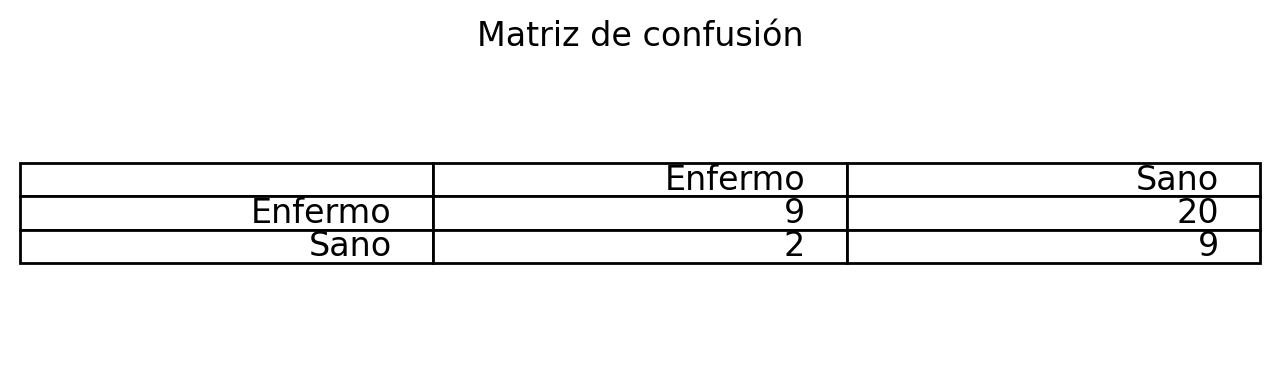

In [18]:
# Matriz ce confusión [rrr4],[rrr5]

VA=0 # Veradadera aceptación
FN=0 # Falsa negación
FA=0 # Falsa aceptación
VR=0 # Verdadero rechazo

for i in range(len(Yprueba)):

    if Yprueba[i]==1 and Yevaluacion[i]==1:
        VA+=1
    
    elif Yprueba[i]==1 and Yevaluacion[i]==0:
        FN+=1
    
    elif Yprueba[i]==0 and Yevaluacion[i]==1:
        FA+=1
    
    else:
        VR+=1
        
FR=FN # Falso rechazo    


fig = plt.figure(dpi=200,figsize=(8,2))
ax = fig.add_subplot(1,1,1)
table_data=[
    ['', 'Enfermo','Sano'],
    ['Enfermo', VA,FN],
    ['Sano', FA,VR]]
table = ax.table(cellText=table_data, loc='center')
table.set_fontsize(12)
ax.axis('off')
ax.set_title('Matriz de confusión')
plt.show()

In [19]:
# Valores estadísticos
EM=(FA+FR)/len(Xprueba)
print(f'Error medio: {EM}')

Precision=VA/(VA+FA)
print(f'Precisión: {Precision}')

sensibilidad=VA/(VA+FR)
print(f'Sensibilidad: {sensibilidad*100} %')

especificidad=VR/(VR+FA)
print(f'Especificidad: {especificidad*100} %')

print(f'Proporción de falsa aceptación: {(1-especificidad)*100} %')

Exactitud=(VA+VR)/len(Xprueba)
print(f'Exactitud: {Exactitud*100} %')

Error medio: 0.55
Precisión: 0.8181818181818182
Sensibilidad: 31.03448275862069 %
Especificidad: 81.81818181818183 %
Proporción de falsa aceptación: 18.181818181818176 %
Exactitud: 45.0 %


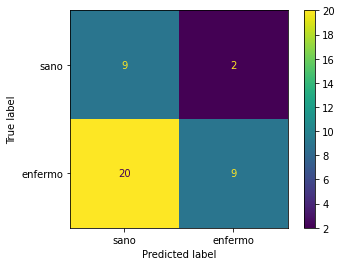

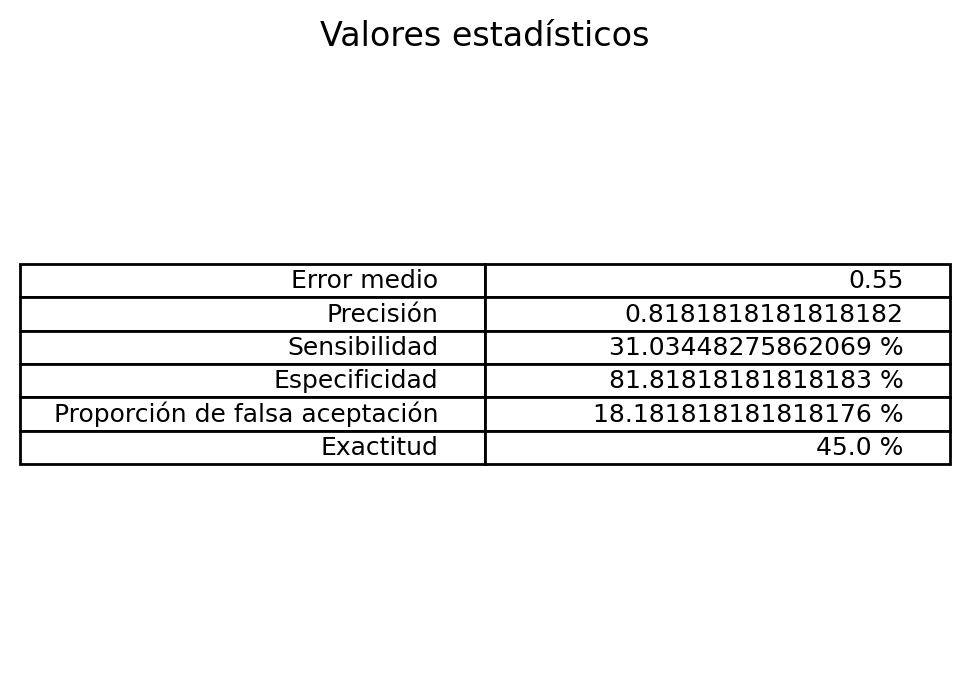

In [40]:
# Con scikit-learn
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py
# https://blog.finxter.com/how-to-plot-sklearn-confusion-matrix-with-labels/
cm = confusion_matrix(Yprueba, Yevaluacion)
tn, fp, fn, tp = cm.ravel() 
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"]).plot()
valoresEstadisticos(Yprueba,tp,fp,fn,tp)

## Entrenamiento con ADALINE

In [11]:
def funAdaline(X,y,a,errorMaximo,iteracionesMaximas):
    '''  
    X: Características n_imagenesxm_caracteristicas
    y: Vector deseado 1xm_características
    a: Constante de aprendizaje 0.1<a<1
    errorMaximo: (valor deseado-valor obtenido)^2/2<errorMaximo
    iteracionesMaximas: Máximas iteraciones
    '''
    
    # Adaptada de [rrr1]
    #A countinuación se presenta el proceso iterativo de todos los pasos descritos para ADALINE
    # MUCHAS ITERACIONES
    
    np.random.seed(1)
    W = 0.02*np.random.random((X.shape[1])) - 1

    j = 0
    iteraciones=0
    while j == 0:
        Merror = 0
        for m in range(X.shape[0]):
            y_cal = np.dot(X[m],W)
        #=========================
        #PASO 3
            error = y[m] - y_cal
            Delta = a * error * X[m] 
        #=========================
        #PASO 4
            # update weights
            W = W + Delta
            Merror = Merror + np.absolute(error)
        if Merror < errorMaximo: 
            j = 1
        elif iteraciones>=iteracionesMaximas:
            j=1

        iteraciones+=1
        #===========================================
        #===========================================

    print(j)
    print(f'iteraciones: {iteraciones}')
    print(f'error: {Merror/X.shape[0]}')
    # print (f"W: {W}")

    return [W,Merror/X.shape[0]]

a=0.01
errorMaximo=0.1
iteracionesMaximas=100_000
W_funAdaline,errorP_funAdaline=funAdaline(X,Y,a,errorMaximo,iteracionesMaximas)


1
iteraciones: 100001
error: 0.30599398076861417


In [41]:
## Evaluación de resultado

Yevaluacion=np.array([], int)

for m in range(Xprueba.shape[0]):
    y_cal = np.dot(Xprueba[m],W_funAdaline)

    if y_cal>errorP_funAdaline:
        Yevaluacion=np.append(Yevaluacion,1)
    else:
        Yevaluacion=np.append(Yevaluacion,0) 



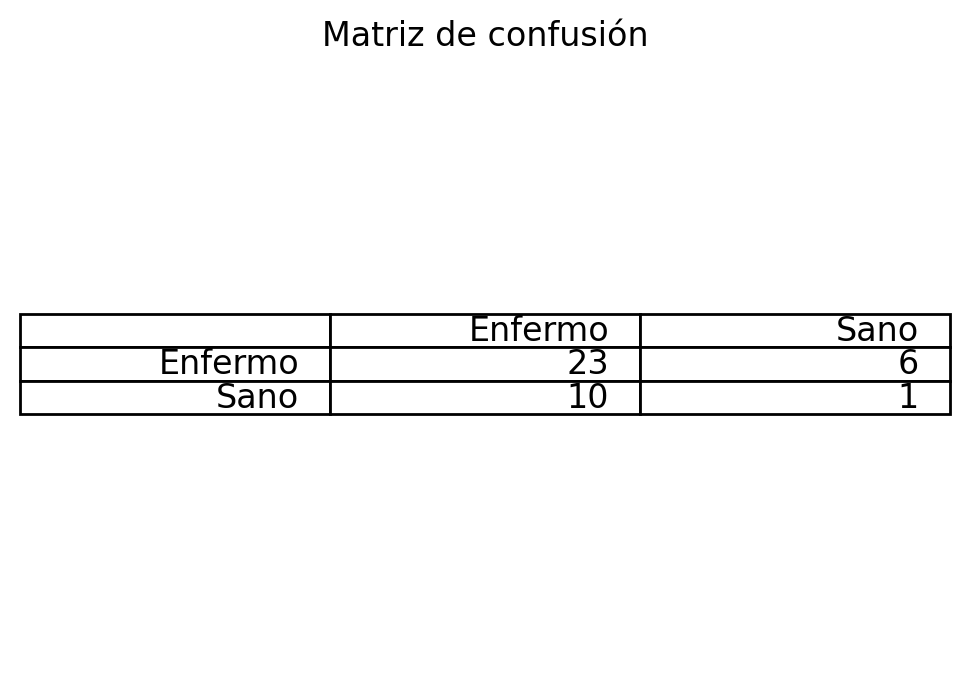

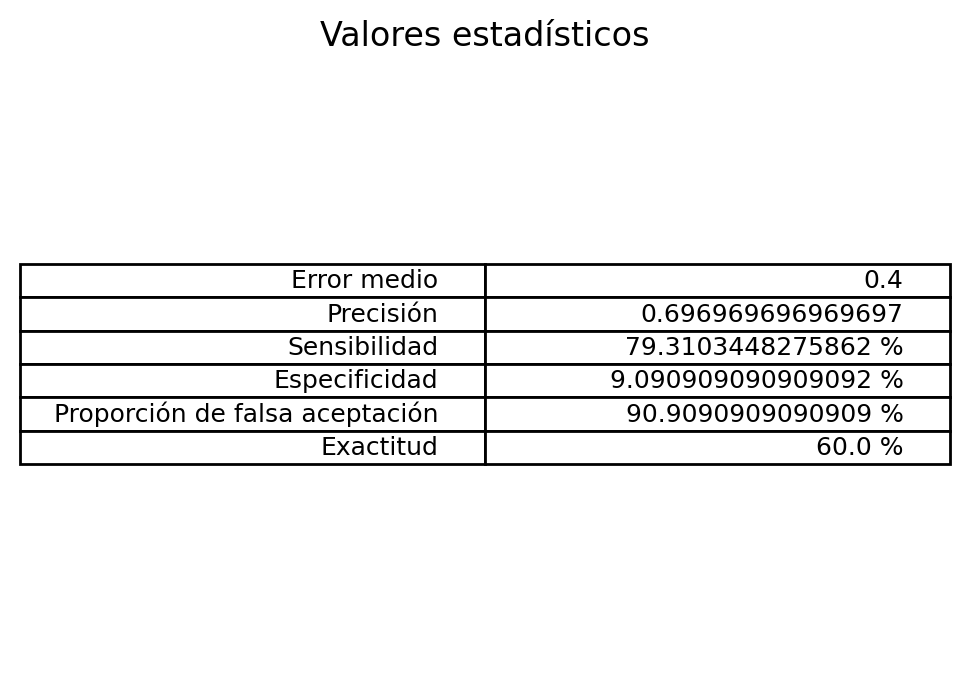

In [42]:
## Matriz de confusión y valores estadísticos 


[VA_adaline,FA_adaline,FR_adaline,VR_adaline]=matrizConfusion(Yprueba,Yevaluacion)
valoresEstadisticos(Yprueba,VA_adaline,FA_adaline,FR_adaline,VR_adaline)



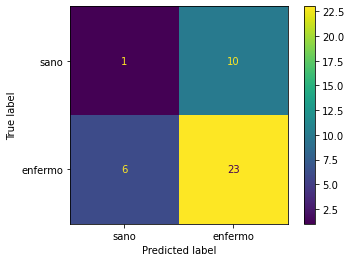

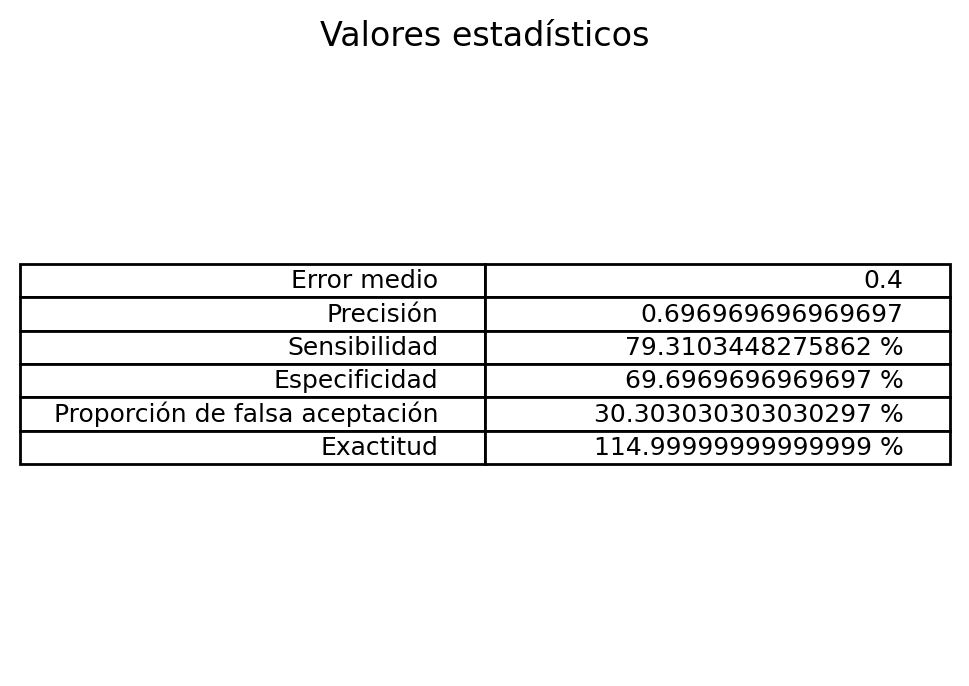

In [43]:
# Con scikit-learn
cm = confusion_matrix(Yprueba, Yevaluacion)
tn, fp, fn, tp = cm.ravel() 
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"]).plot()
valoresEstadisticos(Yprueba,tp,fp,fn,tp)

## A Neural Network in 11 lines of Python
* https://iamtrask.github.io/2015/07/12/basic-python-network/



### Caso: Redes Neuronales de 2 Capas -- Perceptron
<h3> Capa de Entrada más Capa de Salida (capa de neuronas)</h3>

In [48]:
# La funcion de activación tipo sigmoide

def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))


def CapaPerceptronSigmoide(X,Y,iteraciones):

    #==============================================
    #  X: Input dataset matrix where each row is a training example n_imagenesXm_caracteristicas

    #==============================================
    # y: Output dataset matrix where each row is a training example
    # n_imagenesX1
    # Y: salida de la matrix de dataset donde cada fila es target para cada ejemplo de entrenamiento 

    # seed random numbers to make calculation
    # deterministic (just a good practice)
    #Al igual que antes se inicializan los pesos con valores aleatorios
    np.random.seed(1)

    # initialize weights randomly with mean 0


    # syn0: Corresponde a la capa de pesos para Synapse 0, conectando l0 to l1.
    syn0 = 2*np.random.random((X.shape[1],1)) - 1
    
    print(syn0.shape)

    l1=0

    for iter in range(iteraciones):

        # forward propagation // propagación hacia adelante
        # l0:Primera capa de la neurona, definida por el usuario
        # l1: Segunda capa de la red, También llamada capa oculta o intermedia
        
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))
        
        l1_error = Y - l1

        # multiplicar el valor del error por la pendiente del sigmoide en los valores de l1
        l1_delta = l1_error * nonlin(l1,True)

        # Relizar la actualización de pesos.
        syn0 += np.dot(l0.T,l1_delta)

    return [l1,syn0]

l1,syn0=CapaPerceptronSigmoide(X,np.array([Y]).T,100_000)

tabla=np.zeros([len(Y),2])
tabla[:,0]=l1.T
tabla[:,1]=Y

datasetinput = pd.DataFrame(tabla, columns = ['Salida de entrenamiento','Salida esperada'])
pd.set_option("display.max_rows", None)
datasetinput


(17, 1)


,Salida de entrenamiento,Salida esperada
0,1.000000,1.0
1,1.000000,1.0
2,1.000000,1.0
3,1.000000,1.0
4,1.000000,1.0
5,1.000000,1.0
6,1.000000,1.0
7,0.999912,1.0
8,1.000000,1.0
9,1.000000,1.0


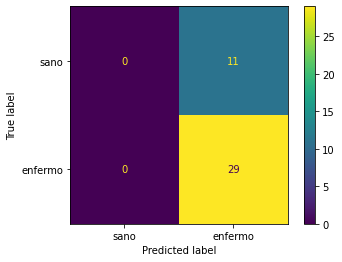

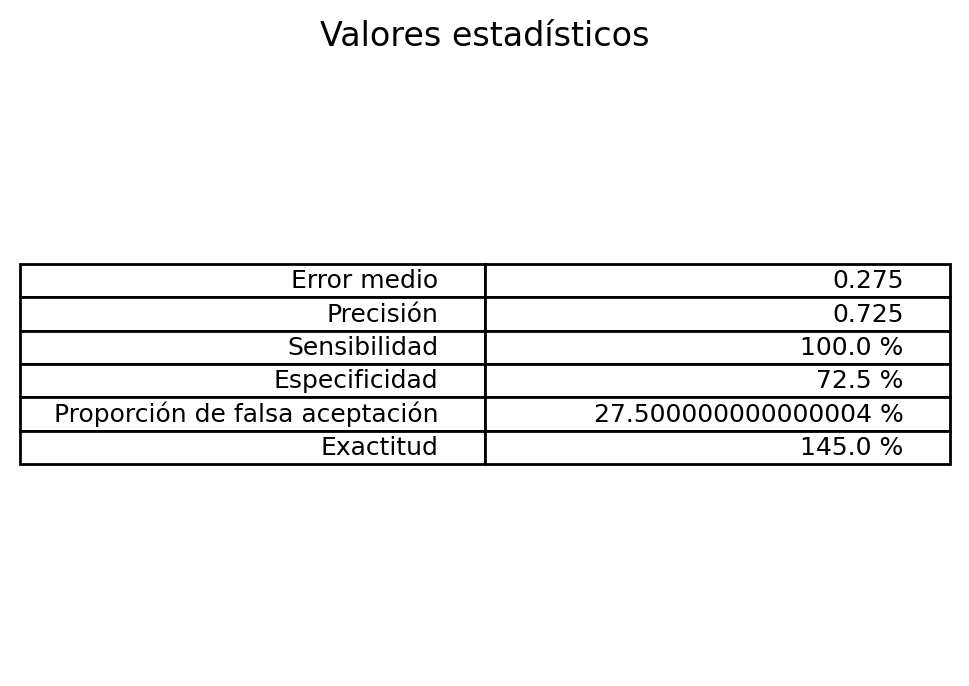

In [56]:
# Evaluación
l0 = Xprueba
l1prueba = nonlin(np.dot(l0,syn0))
Yprediccion=[]

for i in range(len(l1prueba)):
    if l1prueba[i]>=0.5:
        Yprediccion.append(1)
    else:
        Yprediccion.append(0)

# Con scikit-learn
cm = confusion_matrix(Yprueba, Yprediccion)
tn, fp, fn, tp = cm.ravel() 
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"]).plot()
valoresEstadisticos(Yprueba,tp,fp,fn,tp)

### Caso: Redes Neuronales de 3 Capas -- UNA Capa Oculta

* https://iamtrask.github.io/2015/07/12/basic-python-network/


In [58]:
#Funcion de activación
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

def redesNeuronales3CapasOcultas(X,Y,iteracionesMaximas):

    np.random.seed(1)

    # inicialización aleatoria de los pesos para las capas 
    syn0 = 2*np.random.random((X.shape[1],X.shape[0])) - 1
    syn1 = 2*np.random.random((X.shape[0],1)) - 1

    # print (syn0)
    # print (syn1)

    for j in range(iteracionesMaximas):

        # Aplicación del algoritmo Feed forward a través de las capas 0, 1, y 2
        l0 = X
        l1 = nonlin(np.dot(l0,syn0))
        l2 = nonlin(np.dot(l1,syn1))

        # Error con respecto al target
        l2_error = Y - l2
        
        if (j% 10000) == 0:
            print ("Error:" + str(np.mean(np.abs(l2_error))))
            
        #Actualizacion pesos
        l2_delta = l2_error*nonlin(l2,deriv=True)

        # Contribución progresiva del error entre capas
        l1_error = l2_delta.dot(syn1.T)
        
        # Actualización de pesos
        l1_delta = l1_error * nonlin(l1,deriv=True)

        syn1 += l1.T.dot(l2_delta)
        syn0 += l0.T.dot(l1_delta)
    
    return [syn0,syn1,l2]


Xmia=np.array([[0,0,1],
             [0,1,1],
             [1,0,1],
             [1,1,1]])
Ymia= np.array([[0],
			 [1],
			 [1],
			 [0]])

iteracionesMaximas=100_000
syn0,syn1,l2=redesNeuronales3CapasOcultas(X,np.array([Y]).T,iteracionesMaximas)

tabla[:,0]=l2.T
tabla[:,1]=Y

datasetinput = pd.DataFrame(tabla, columns = ['Salida de entrenamiento','Salida esperada'])
#pd.set_option("display.max_rows", None)
datasetinput



Error:0.3431416367586628
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666
Error:0.7291666666666666


,Salida de entrenamiento,Salida esperada
0,4.353741e-21,1.0
1,1.446853e-21,1.0
2,1.070864e-21,1.0
3,6.066815e-20,1.0
4,4.270410e-21,1.0
5,1.171502e-20,1.0
6,9.264420e-21,1.0
7,1.291473e-18,1.0
8,1.057667e-21,1.0
9,9.896313e-21,1.0


/tmp/ipykernel_5673/261739477.py:63: RuntimeWarning: invalid value encountered in long_scalars
  Precision=VA/(VA+FA)
/tmp/ipykernel_5673/261739477.py:69: RuntimeWarning: invalid value encountered in long_scalars
  especificidad=VR/(VR+FA)


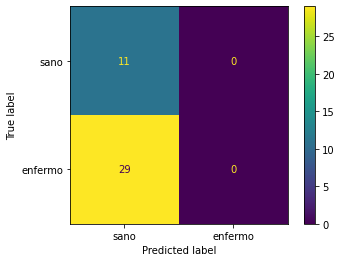

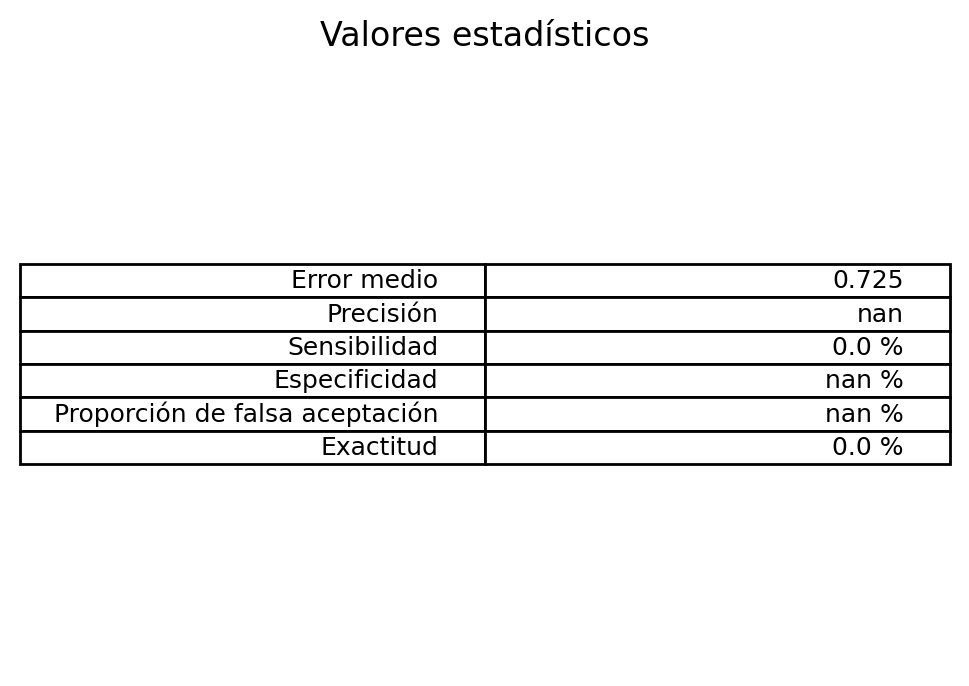

In [59]:
# Evaluación
l0 = Xprueba
l1 = nonlin(np.dot(l0,syn0))
l2prueba = nonlin(np.dot(l1,syn1))
Yprediccion=[]

for i in range(len(l1prueba)):
    if l2prueba[i]>=0.5:
        Yprediccion.append(1)
    else:
        Yprediccion.append(0)

# Con scikit-learn
cm = confusion_matrix(Yprueba, Yprediccion)
tn, fp, fn, tp = cm.ravel() 
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"]).plot()
valoresEstadisticos(Yprueba,tp,fp,fn,tp)

## Implementación de una  red Neural desde Scratch usando Python

* http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

* https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

In [12]:
# Entrenar el clasificador de regresión logística con funciones sklearn
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, Y)


/home/esteban/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/esteban/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

LogisticRegressionCV()

In [36]:
# Función auxiliar para evaluar la pérdida total en el conjunto de datos
def calculate_loss(model,X,Y,reg_lambda):
    '''  
    model: Modelo
    X: Datos de entrenamiento
    Y: Salidas deseadas de entrenamiento
    reg_lambda: Reguración de la magnitud
    '''
    num_examples=len(X)
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Propagación directa para calcular las predicciones
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculo de cuanta es la perdida
    corect_logprobs = -np.log(probs[range(num_examples), Y])
    data_loss = np.sum(corect_logprobs)
    # Agregar término de regulación a la pérdida (opcional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Función auxiliar para predecir una salida (0 o 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# La siguiente función aprende parámetros para la red neuronal y devuelve el modelo.
# - nn_hdim:    Número de nodos en la capa oculta
# - num_passes: Número de pasadas a través de los datos de entrenamiento para descenso de gradiente
# - print_loss: Si es Verdadero, imprime la pérdida cada 1000 iteraciones
def build_model(nn_hdim,X,Y,reg_lambda,epsilon,nn_output_dim,num_passes=20000, print_loss=False):
    

    # Variables necesarias
    num_examples = len(X) # tamaño del dataset de entrada(entrenamiento)
    nn_input_dim = X.shape[1] # dimensión de capa entrada

    # Inicializar los parámetros a valores aleatorios. De estos se realiza el aprendizaje
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # Resultado final
    model = {}
    
 
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), Y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Agregar términos de regularización
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Actualización del parámetro de descenso de gradiente
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Asignar nuevos parámetros al modelo.
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Impresión de la perdida
        if print_loss and i % 1000 == 0:
          print ("Loss after iteration %i: %f" %(i, calculate_loss(model,X,Y,reg_lambda)))
    
    return model


### Aplicación en red con capa oculta de tamaño 3 bi-clase

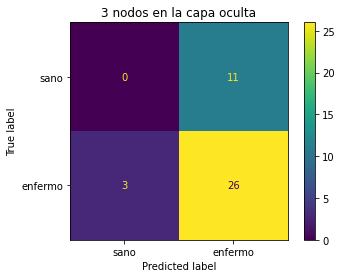

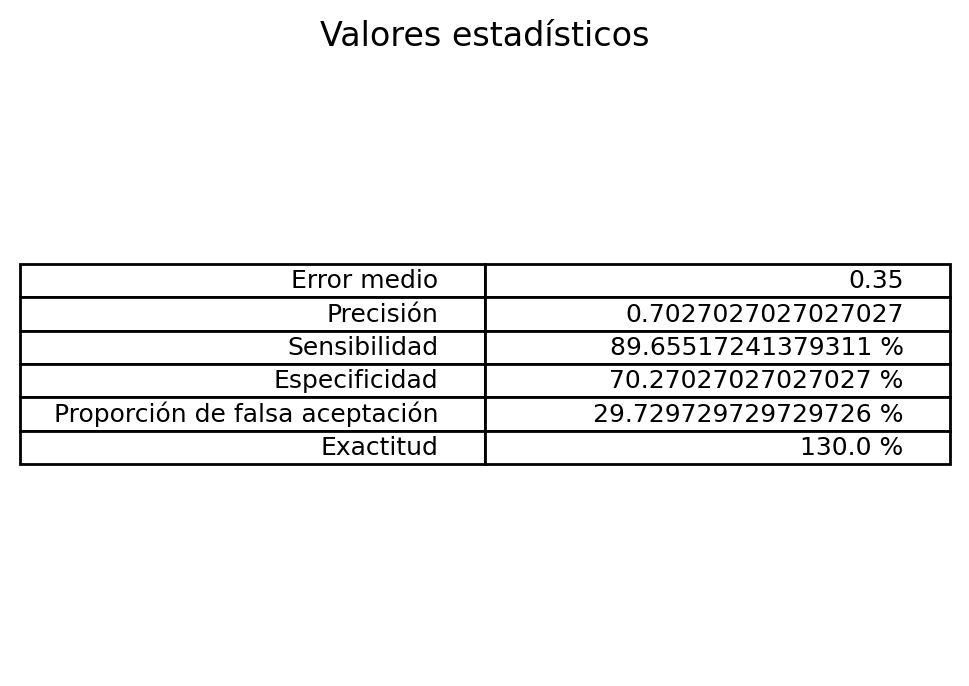

In [37]:
# Construcción de un modelo con una capa oculta tridimensional
nn_hdim=3 # Número de nodos de la capa oculta
nn_output_dim = 2 # dimensión de capa de salida
#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 

model = build_model(nn_hdim,X,Y,reg_lambda,epsilon,nn_output_dim, print_loss=False)
Yprediccion=predict(model, Xprueba)
# Con scikit-learn
cm = confusion_matrix(Yprueba, Yprediccion)
tn, fp, fn, tp = cm.ravel() 
cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"])
cm_display.plot()
cm_display.ax_.set_title(f'{nn_hdim} nodos en la capa oculta')
valoresEstadisticos(Yprueba,tp,fp,fn,tp)


### Variación el tamaño de la capa oculta bi-clase



Hidden Layer size: 1


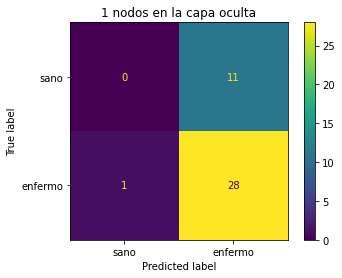

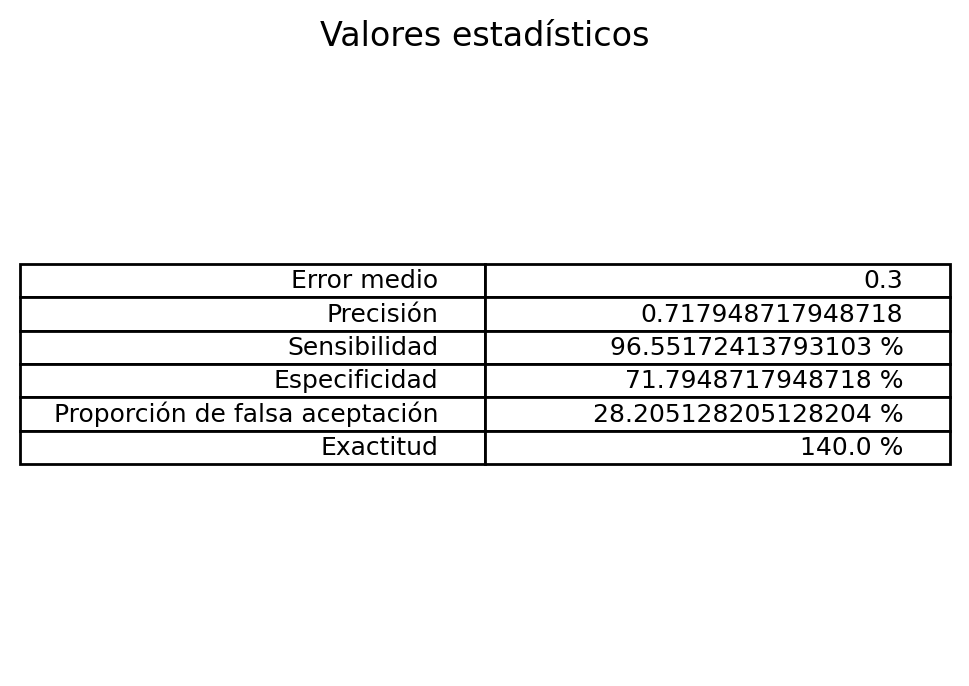



Hidden Layer size: 2


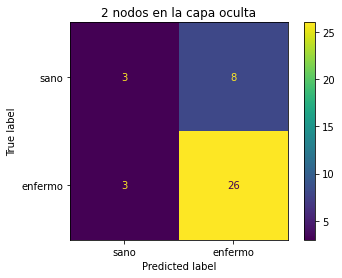

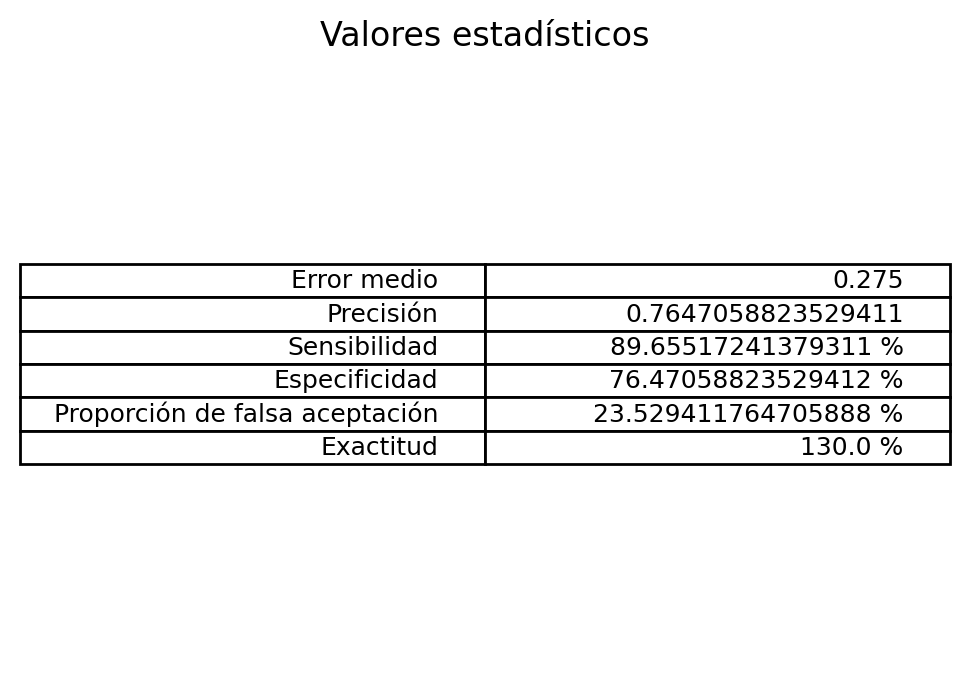



Hidden Layer size: 3


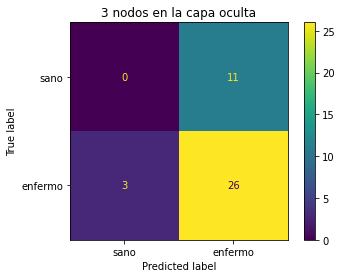

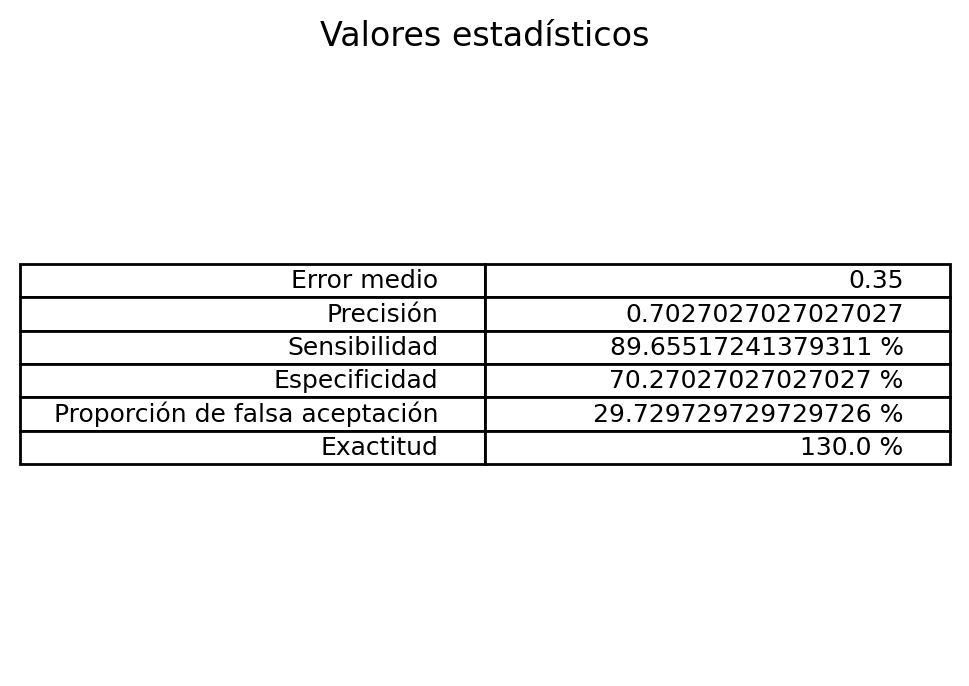



Hidden Layer size: 4


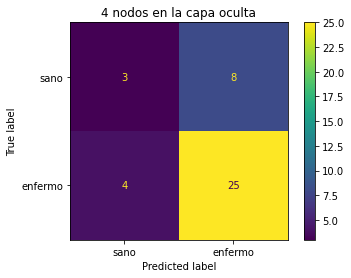

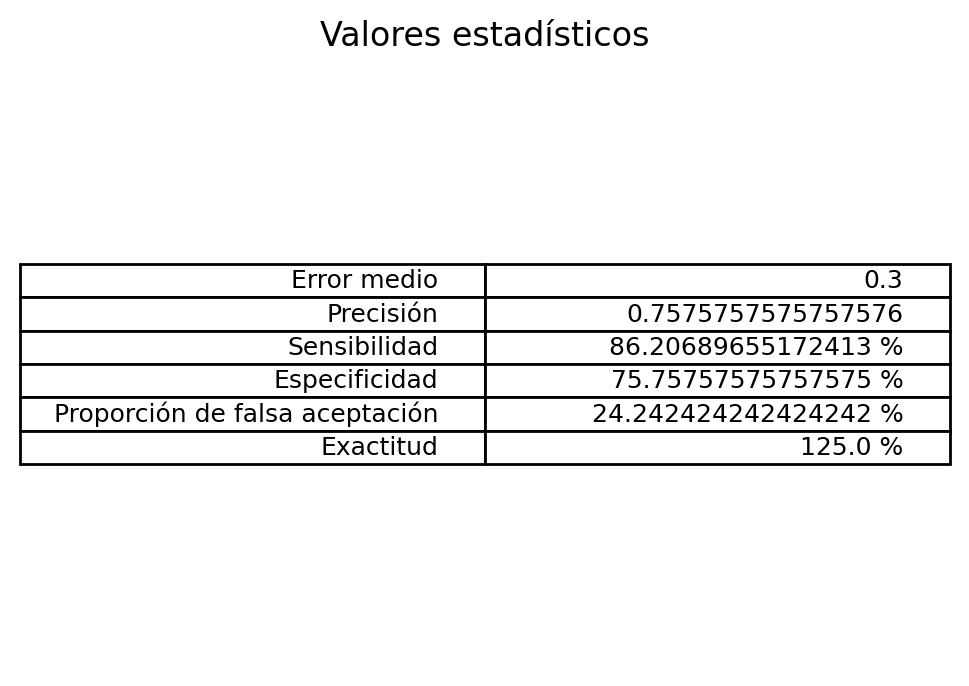



Hidden Layer size: 5


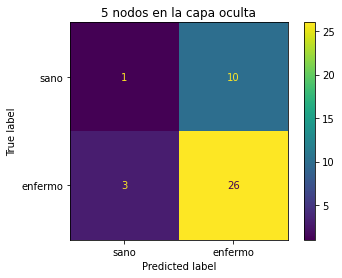

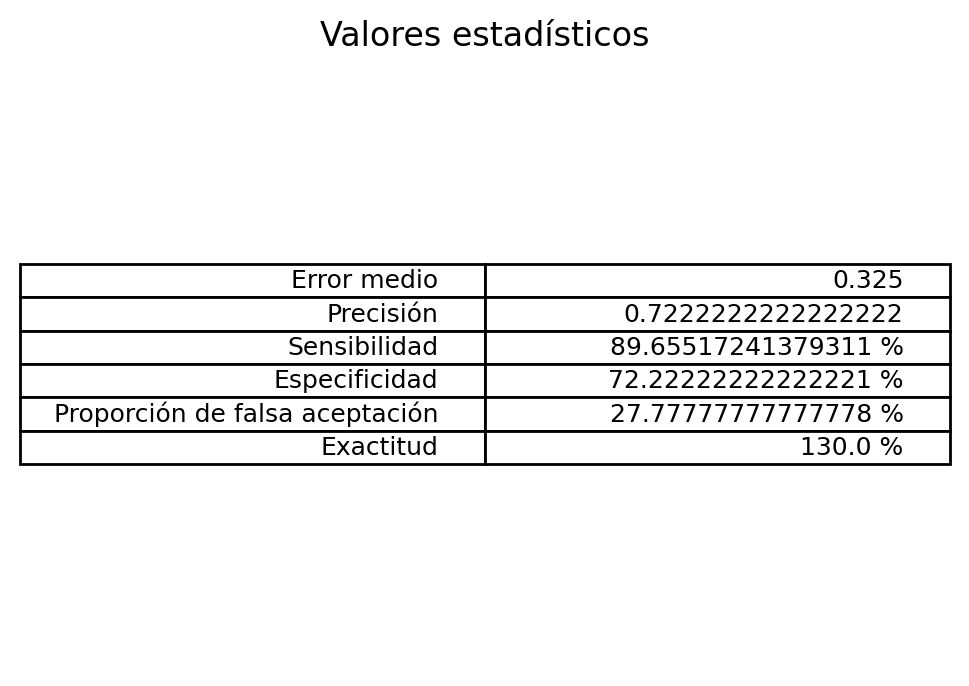



Hidden Layer size: 20


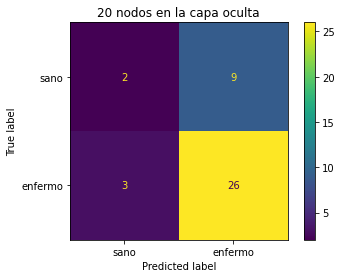

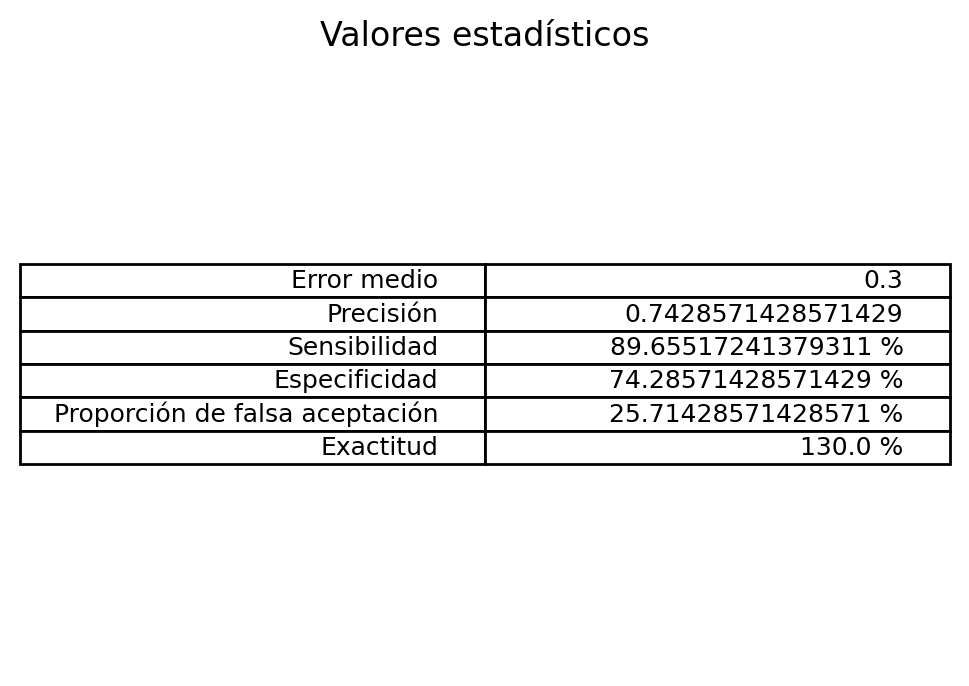



Hidden Layer size: 50


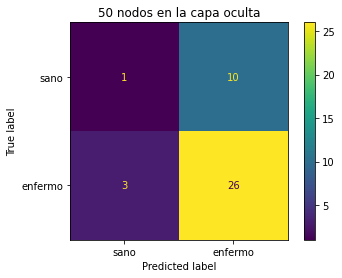

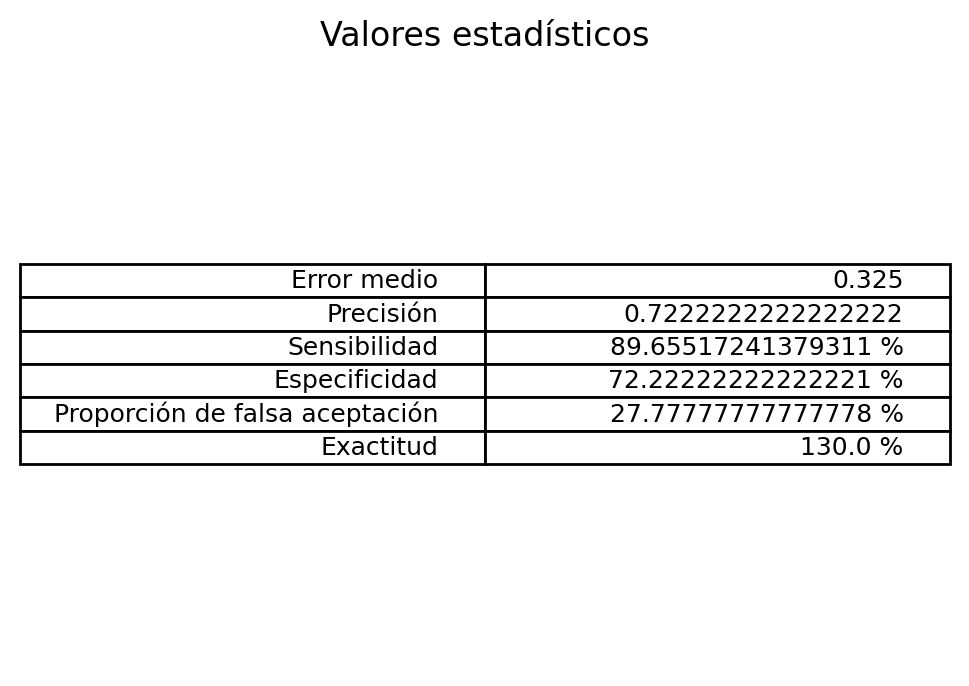

In [38]:
nn_output_dim = 2 # dimensión de capa de salida
#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print(f'\n\nHidden Layer size: {nn_hdim}')
    model = build_model(nn_hdim,X,Y,reg_lambda,epsilon,nn_output_dim,print_loss=False)
    
    # Matriz de confusión Con scikit-learn
    Yprediccion=predict(model, Xprueba)
    cm = confusion_matrix(Yprueba, Yprediccion)
    tn, fp, fn, tp = cm.ravel() 
    cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"])
    cm_display.plot()
    cm_display.ax_.set_title(f'{nn_hdim} nodos en la capa oculta')
    valoresEstadisticos(Yprueba,tp,fp,fn,tp)





Hidden Layer size: 2


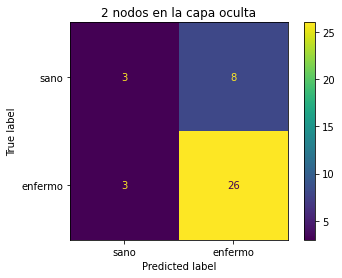

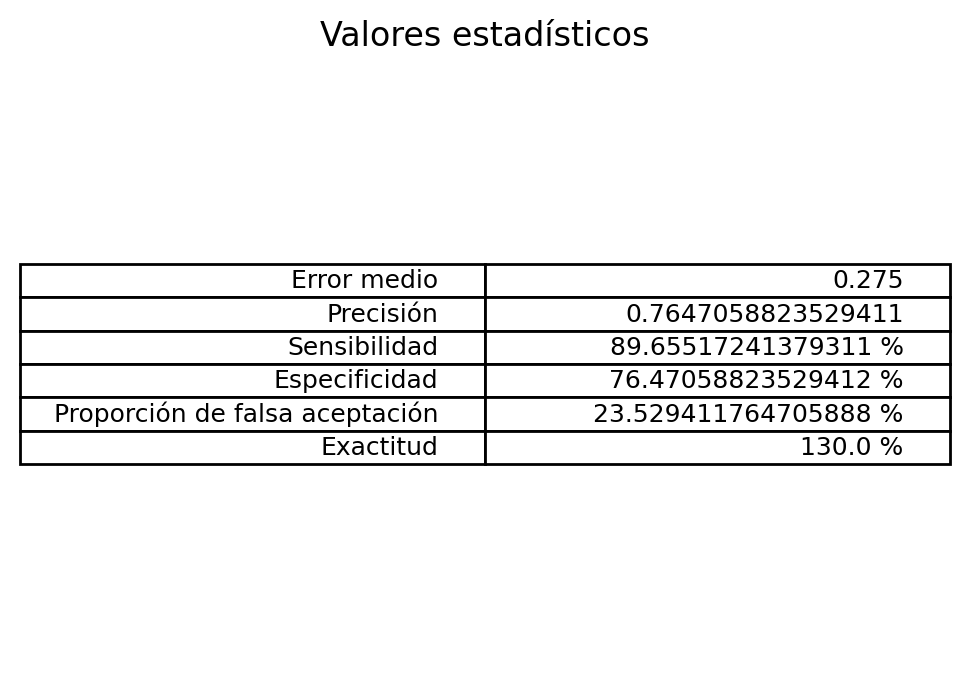



Hidden Layer size: 4


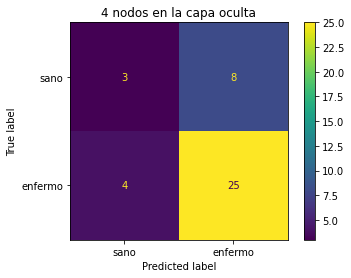

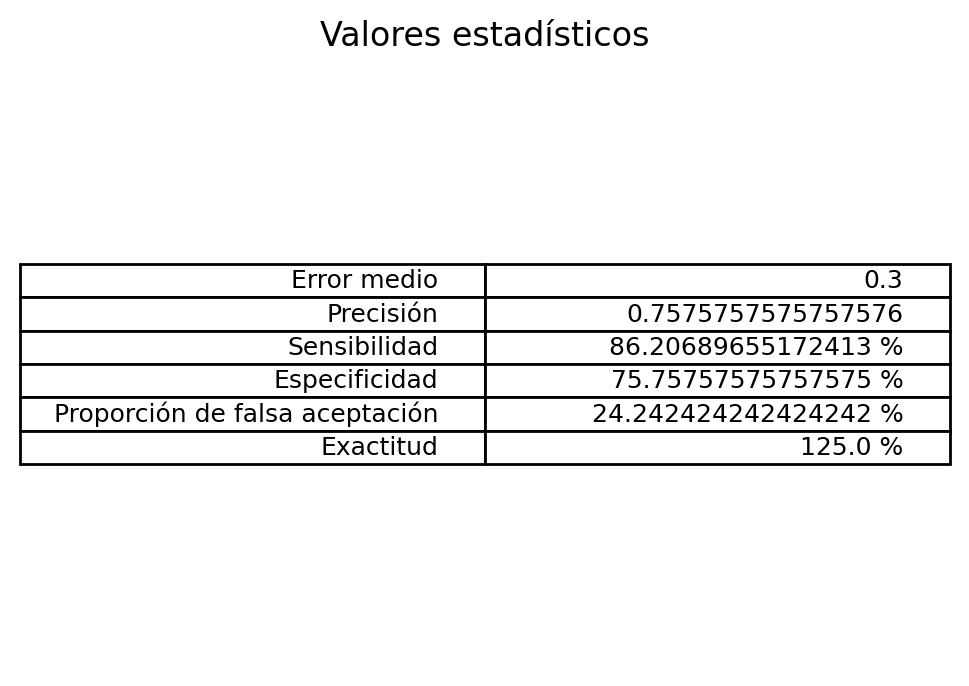



Hidden Layer size: 6


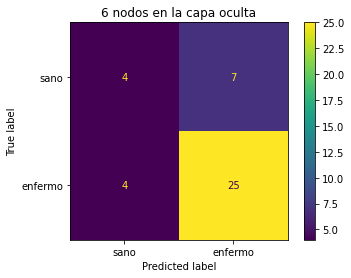

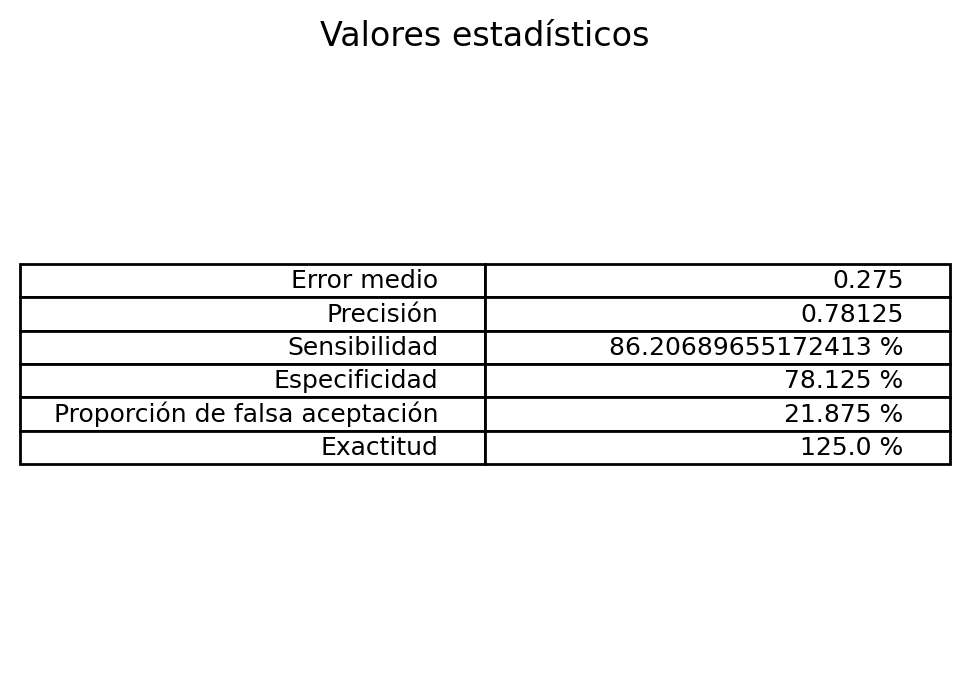



Hidden Layer size: 8


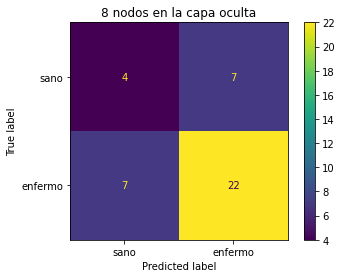

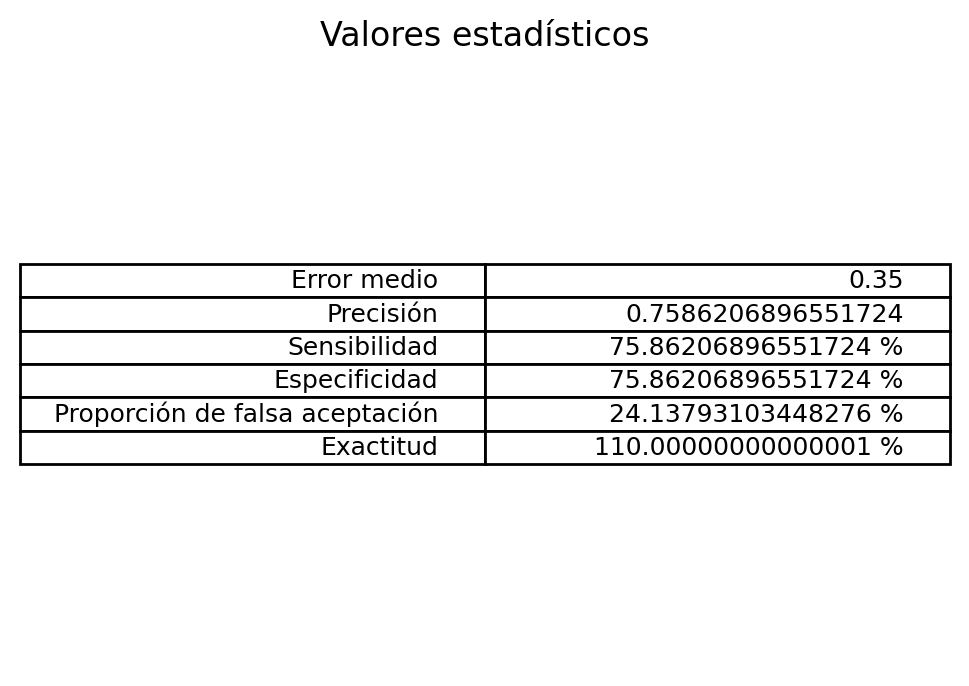



Hidden Layer size: 10


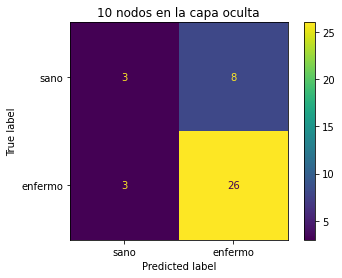

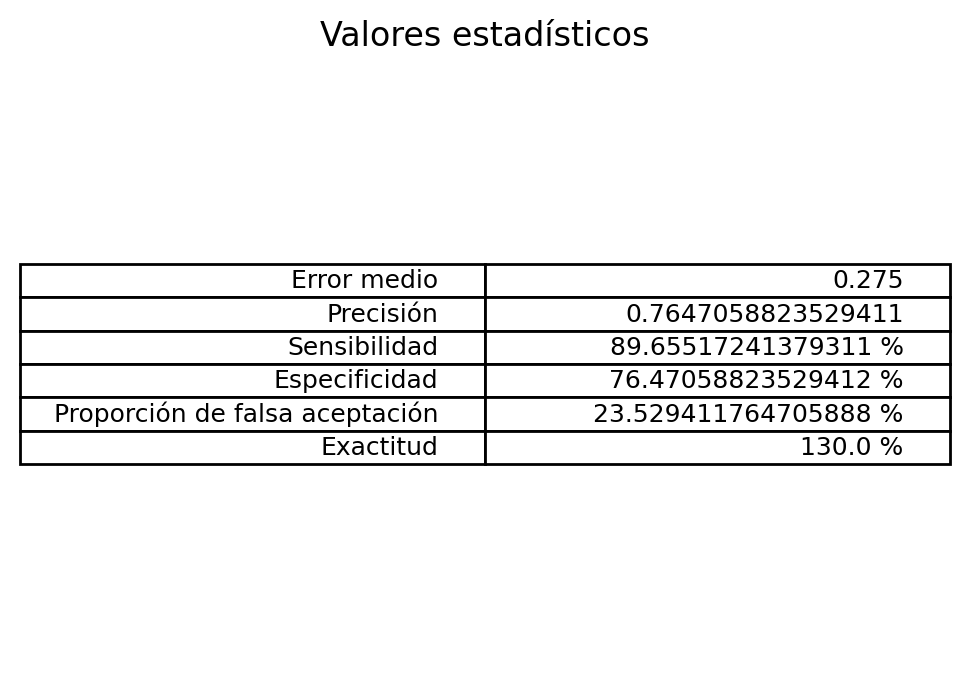



Hidden Layer size: 12


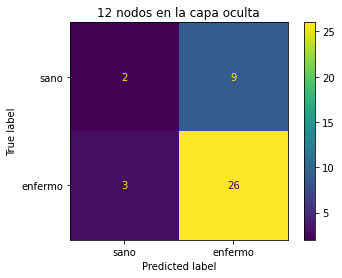

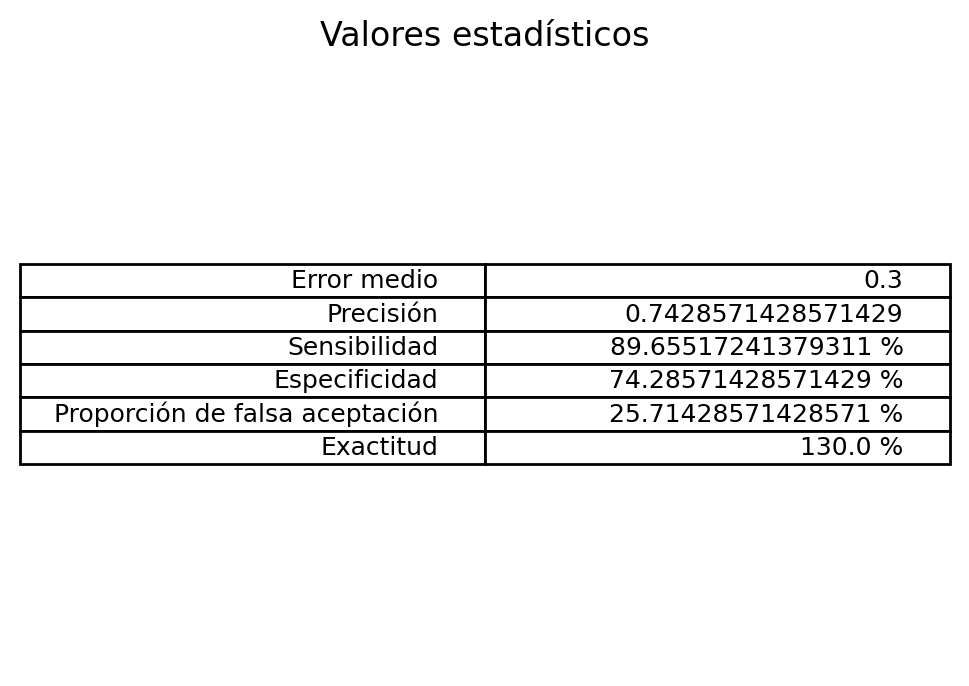



Hidden Layer size: 14


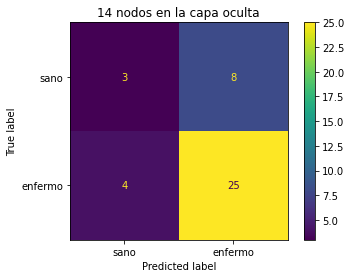

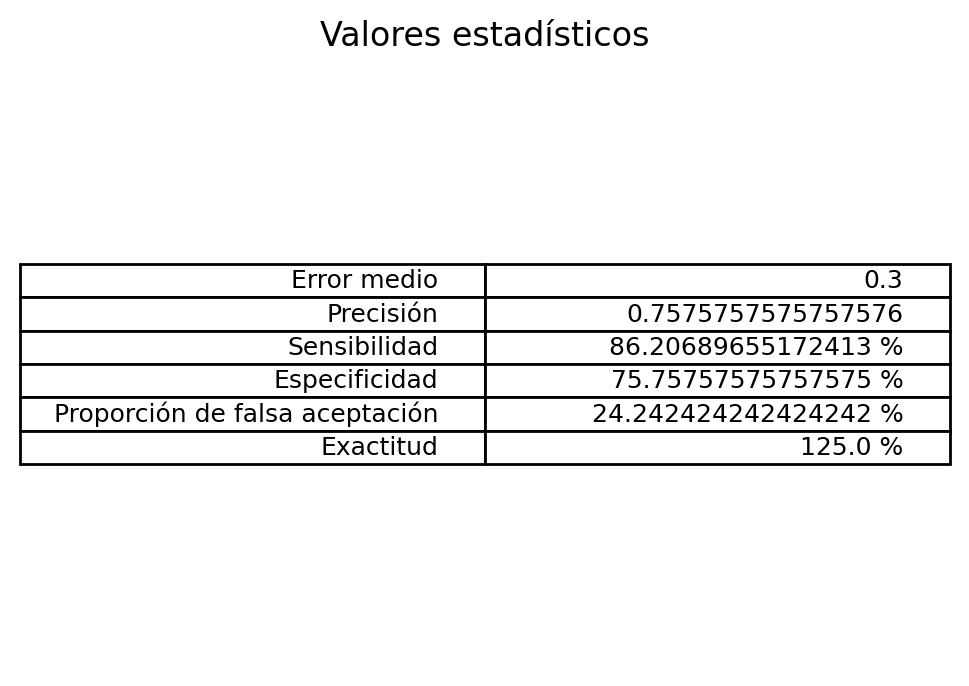

In [39]:
nn_output_dim = 2 # dimensión de capa de salida

#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 
hidden_layer_dimensions = [2, 4, 6, 8, 10, 12, 14]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print(f'\n\nHidden Layer size: {nn_hdim}')
    model = build_model(nn_hdim,X,Y,reg_lambda,epsilon,nn_output_dim,print_loss=False)
    
    # Matriz de confusión Con scikit-learn
    Yprediccion=predict(model, Xprueba)
    cm = confusion_matrix(Yprueba, Yprediccion)
    tn, fp, fn, tp = cm.ravel() 
    cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","enfermo"])
    cm_display.plot()
    cm_display.ax_.set_title(f'{nn_hdim} nodos en la capa oculta')
    valoresEstadisticos(Yprueba,tp,fp,fn,tp)


### Variación del tamaño de la capa oculta tres clases



Hidden Layer size: 1


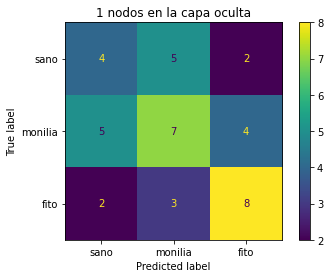



Hidden Layer size: 2


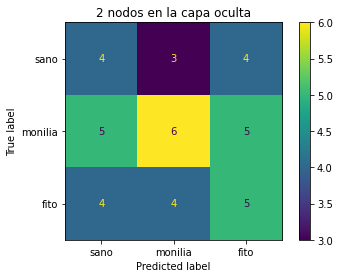



Hidden Layer size: 3


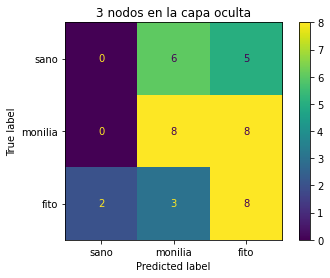



Hidden Layer size: 4


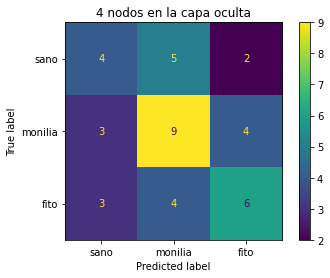



Hidden Layer size: 5


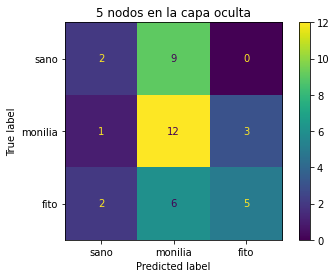



Hidden Layer size: 20


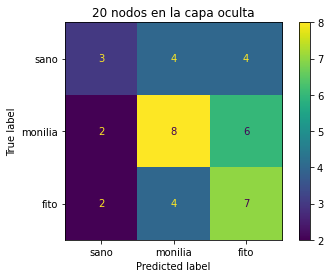



Hidden Layer size: 50


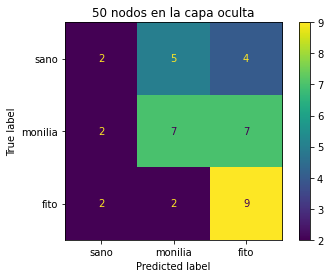

In [45]:
#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 
nn_output_dim = 3 # dimensión de capa de salida

hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print(f'\n\nHidden Layer size: {nn_hdim}')
    model = build_model(nn_hdim,X,Y3Clases,reg_lambda,epsilon,nn_output_dim,print_loss=False)
    
    # Matriz de confusión Con scikit-learn
    Yprediccion=predict(model, Xprueba)
    cm = confusion_matrix(Yprueba3Clases, Yprediccion)
    # tn, fp, fn, tp = cm.ravel() 
    cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","monilia","fito"]).plot()
    cm_display.ax_.set_title(f'{nn_hdim} nodos en la capa oculta')
    plt.show()
    # valoresEstadisticos(Yprueba,tp,fp,fn,tp)



Hidden Layer size: 2


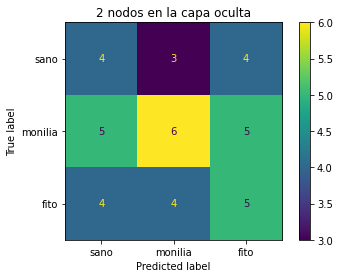



Hidden Layer size: 4


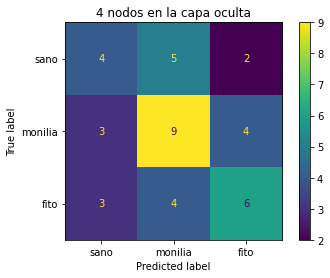



Hidden Layer size: 6


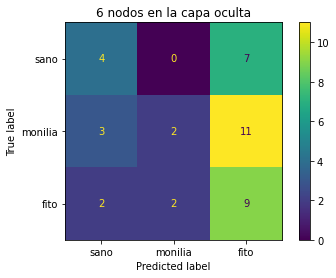



Hidden Layer size: 8


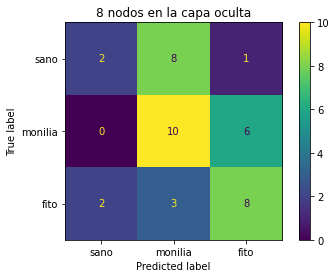



Hidden Layer size: 10


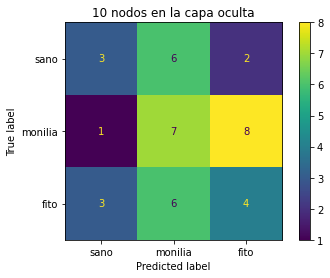



Hidden Layer size: 12


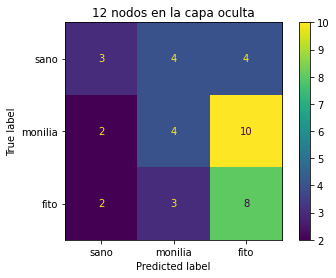



Hidden Layer size: 14


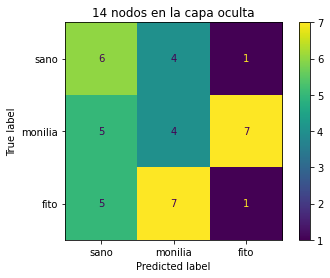

In [44]:
#Parámetros de descenso de gradiente 
epsilon = 0.01 # taza de aprendizaje
reg_lambda = 0.01 
nn_output_dim = 3 # dimensión de capa de salida

hidden_layer_dimensions = [2, 4, 6, 8, 10, 12, 14]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print(f'\n\nHidden Layer size: {nn_hdim}')
    model = build_model(nn_hdim,X,Y3Clases,reg_lambda,epsilon,nn_output_dim,print_loss=False)
    
    # Matriz de confusión Con scikit-learn
    Yprediccion=predict(model, Xprueba)
    cm = confusion_matrix(Yprueba3Clases, Yprediccion)
    # tn, fp, fn, tp = cm.ravel() 
    cm_display = ConfusionMatrixDisplay(cm,display_labels=["sano","monilia","fito"]).plot()
    cm_display.ax_.set_title(f'{nn_hdim} nodos en la capa oculta')
    plt.show()
    # valoresEstadisticos(Yprueba,tp,fp,fn,tp)